# ASSIGNMENT-01

# 1.Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start, B=goal). 
- Use Manhattan distance as heuristic.
- Visualize the path found.

Path found: [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (11, 4), (11, 5), (11, 6), (10, 6), (10, 7), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (8, 11), (7, 11), (6, 11), (5, 11), (4, 11), (3, 11), (2, 11), (1, 11), (0, 11)]


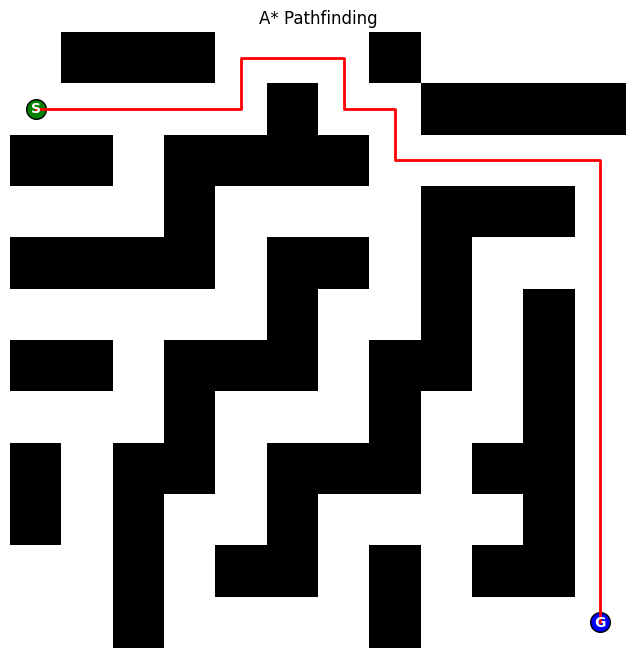

In [12]:
def find_shortest_path(maze, start_pos, goal_pos, distance_scale=1.0):
  
    #Heuristic function (Manhattan distance)
    def heuristic(pos_a, pos_b):
        return distance_scale * (abs(pos_a[0] - pos_b[0]) + abs(pos_a[1] - pos_b[1]))  # Using distance_scale parameter

    nodes_to_explore = [(heuristic(start_pos, goal_pos), 0, start_pos, [start_pos])]
    shortest_cost_to = {start_pos: 0}  #Track shortest path cost to each position
    visited_positions = set()  #Keep track of processed positions

    #Main loop: explore nodes until goal is found
    while nodes_to_explore:

        # Pick the node with the lowest estimated total cost (f = g + h)
        best_index = 0
        for i in range(len(nodes_to_explore)):
            if nodes_to_explore[i][0] < nodes_to_explore[best_index][0]:
                best_index = i
        total_estimated_cost, path_cost, current_pos, path_so_far = nodes_to_explore.pop(best_index)

        # Skip if already processed
        if current_pos in visited_positions:
            continue

        # Mark current position as processed
        visited_positions.add(current_pos)

        #Goal check: if we reached the goal, return the path
        if current_pos == goal_pos:
            return path_so_far

        #Explore neighbors (up, down, left, right)
        for delta_row, delta_col in [(1,0), (-1,0), (0,1), (0,-1)]:
            neighbor_row = current_pos[0] + delta_row
            neighbor_col = current_pos[1] + delta_col
            neighbor_pos = (neighbor_row, neighbor_col)

            # Stay inside maze boundaries and avoid walls
            if 0 <= neighbor_row < len(maze) and 0 <= neighbor_col < len(maze[0]):
                if maze[neighbor_row][neighbor_col] != 1:

                    # Tentative path cost to neighbor
                    tentative_cost = path_cost + 1

                    #Only add neighbor if: Not fully processed, AND We found a shorter path to it
                    if neighbor_pos not in visited_positions or tentative_cost < shortest_cost_to.get(neighbor_pos, float('inf')):
                        shortest_cost_to[neighbor_pos] = tentative_cost
                        estimated_total = tentative_cost + heuristic(neighbor_pos, goal_pos)
                        nodes_to_explore.append((estimated_total, tentative_cost, neighbor_pos, path_so_far + [neighbor_pos]))

    return None


# Visualize the path found.
import matplotlib.pyplot as plt
import numpy as np

def draw_maze(maze, path, start, goal, title="A* Pathfinding"):
    grid = np.array([[1 if cell == 1 else 0 for cell in row] for row in maze])
    plt.figure(figsize=(8,8))
    plt.imshow(grid, cmap="binary")

    # Plot path
    if path:
        rows, cols = zip(*path)
        plt.plot(cols, rows, color="red", linewidth=2, label="Path")

    # Plot start and goal
    sr, sc = start
    gr, gc = goal
    plt.scatter(sc, sr, c='green', s=200, edgecolors='black', label='Start')
    plt.text(sc, sr, 'S', color='white', ha='center', va='center', weight='bold')
    
    plt.scatter(gc, gr, c='blue', s=200, edgecolors='black', label='Goal')
    plt.text(gc, gr, 'G', color='white', ha='center', va='center', weight='bold')

    plt.title(title)
    plt.gca().invert_yaxis()  # origin at top-left
    plt.axis('off')
    plt.show()

mazeArr = [
    [0,0,1,0,0,0,0,1,0,0,0,"B"],
    [0,0,1,0,1,1,0,1,0,1,1,0],
    [1,0,1,0,0,1,0,0,0,0,1,0],
    [1,0,1,1,0,1,1,1,0,1,1,0],
    [0,0,0,1,0,0,0,1,0,0,1,0],
    [1,1,0,1,1,1,0,1,1,0,1,0],
    [0,0,0,0,0,1,0,0,1,0,1,0],
    [1,1,1,1,0,1,1,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,1,1,1,0],
    [1,1,0,1,1,1,1,0,0,0,0,0],
    ["A",0,0,0,0,1,0,0,1,1,1,1],
    [0,1,1,1,0,0,0,1,0,0,0,0],
]

# Convert to numpy and detect start/goal
maze = np.zeros((len(mazeArr), len(mazeArr[0])), dtype=int)
start, goal = None, None

for i in range(len(mazeArr)):
    for j in range(len(mazeArr[0])):
        if mazeArr[i][j] == 'A':
            start = (i, j)
            maze[i, j] = 0
        elif mazeArr[i][j] == 'B':
            goal = (i, j)
            maze[i, j] = 0
        else:
            maze[i, j] = mazeArr[i][j]

# Run pathfinding algorithm
path = find_shortest_path(maze, start, goal)

# Print path and visualize
print("Path found:", path)
draw_maze(maze, path, start, goal)


# 2. Modify the heuristic:
- Case 1: Multiply Manhattan distance by 1.5 (check if it is admissible).

Path found: [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (11, 4), (11, 5), (11, 6), (10, 6), (10, 7), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (8, 11), (7, 11), (6, 11), (5, 11), (4, 11), (3, 11), (2, 11), (1, 11), (0, 11)]
Path cost: 23


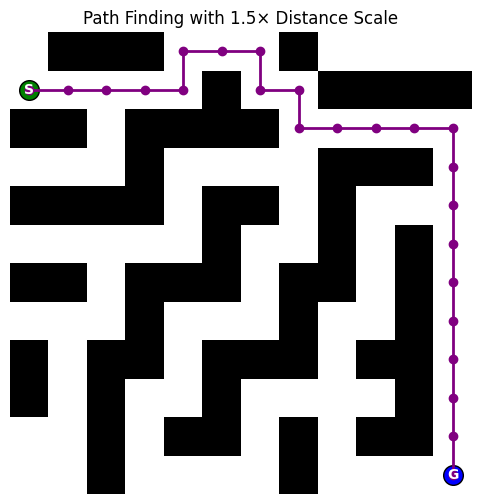

In [13]:
def calculate_distance_scaled(point1, point2):
    dx = abs(point1[0] - point2[0])
    dy = abs(point1[1] - point2[1])
    return 5.0 * max(dx, dy)  # Use maximum of dx/dy to encourage diagonal moves

def find_path_scaled(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    
    # Each element: (f_score, g_score, position, path_so_far)
    open_list = [(calculate_distance_scaled(start, goal), 0, start, [start])]
    g_score = {start: 0}
    visited = set()

    while open_list:
        # Find node with smallest f_score manually
        best_index = 0
        for i in range(len(open_list)):
            if open_list[i][0] < open_list[best_index][0]:
                best_index = i
        f_current, g_current, current, path_so_far = open_list.pop(best_index)

        if current in visited:
            continue
        visited.add(current)

        # Goal reached
        if current == goal:
            return path_so_far

        # Explore neighbors (up, down, left, right)
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                tentative_g = g_current + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + calculate_distance_scaled(neighbor, goal)
                    open_list.append((f_score, tentative_g, neighbor, path_so_far + [neighbor]))
    return None

path = find_path_scaled(maze, start, goal)
print("Path found:", path)
print("Path cost:", len(path)-1 if path else None)


plt.figure(figsize=(6,6))
plt.imshow(maze, cmap="binary")

if path:
    px, py = zip(*path)
    plt.plot(py, px, color="purple", linewidth=2, marker="o")

# Start and goal markers
plt.scatter(start[1], start[0], color="green", s=200, edgecolors="black")
plt.text(start[1], start[0], "S", color="white", ha="center", va="center", weight="bold")

plt.scatter(goal[1], goal[0], color="blue", s=200, edgecolors="black")
plt.text(goal[1], goal[0], "G", color="white", ha="center", va="center", weight="bold")

plt.title("Path Finding with 1.5× Distance Scale")
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

# case 2
Define heuristic so that for one edge it violates consistency.

Path found: [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (11, 4), (11, 5), (11, 6), (10, 6), (10, 7), (9, 7), (8, 7), (7, 7), (6, 7), (6, 6), (5, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6), (2, 6), (2, 7), (2, 8), (1, 8), (0, 8), (0, 9), (0, 10), (0, 11)]
Path cost: 35


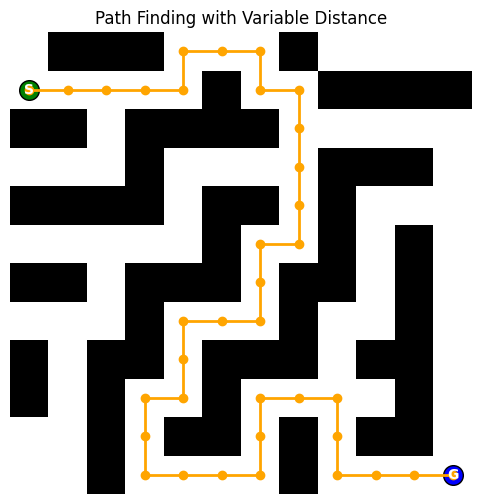

In [14]:

import heapq

def inconsistent_heuristic(a, b):
    base = abs(a[0] - b[0]) + abs(a[1] - b[1])
    if a[0] % 2 == 0:
        return max(0, base - 8)
    else:
        return base * 8.0  # Much higher multiplier for odd rows

# Find Path with Variable Distance Estimation
def find_path_variable(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    
    open_heap = []
    heapq.heappush(open_heap, (inconsistent_heuristic(start, goal), 0, start, [start]))
    
    # Track the best g_score for each node
    g_score = {start: 0}

    while open_heap:
        f_current, g_current, current, path_so_far = heapq.heappop(open_heap)
        
        # Check if we reached our destination
        if current == goal:
            return path_so_far  # We found the way!
        
        # Explore neighbors
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                tentative_g = g_current + 1
                
                # Is this a better way to get to this spot? If yes, remember it!
                # Just like finding a shortcut to your favorite store
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + inconsistent_heuristic(neighbor, goal)
                    heapq.heappush(open_heap, (f_score, tentative_g, neighbor, path_so_far + [neighbor]))
    
    return None  # no path found


path = find_path_variable(maze, start, goal)
print("Path found:", path)
print("Path cost:", len(path)-1 if path else None)


plt.figure(figsize=(6,6))
plt.imshow(maze, cmap="binary")

if path:
    px, py = zip(*path)
    plt.plot(py, px, color="orange", linewidth=2, marker="o")

# Start and Goal markers
plt.scatter(start[1], start[0], color="green", s=200, edgecolors="black")
plt.text(start[1], start[0], "S", color="white", ha="center", va="center", weight="bold")

plt.scatter(goal[1], goal[0], color="blue", s=200, edgecolors="black")
plt.text(goal[1], goal[0], "G", color="white", ha="center", va="center", weight="bold")

plt.title("Path Finding with Variable Distance")
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()


# 3. For each case, run A* and record:
- Path found
- Cost of path
- Whether the path is optimal

In [15]:
from collections import deque

def bfs_shortest_path_length(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    visited = set()
    queue = deque([(start, 0)])
    visited.add(start)

    while queue:
        current, cost = queue.popleft()
        if current == goal:
            return cost
        r, c = current
        for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
            nr, nc = r + dr, c + dc
            neighbor = (nr, nc)
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0 and neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, cost+1))
    return float('inf')  # no path exists


# Optimality check using BFS

def is_optimal(path, maze):
    if not path:
        return False
    actual_cost = len(path) - 1
    shortest_cost = bfs_shortest_path_length(maze, path[0], path[-1])
    return actual_cost == shortest_cost

# Path cost helper

def path_cost(path):
    if path:
        return len(path) - 1
    return None


pathfinding_methods = [
    ("Basic Distance", find_shortest_path),           # regular block distance
    ("Scaled Distance (1.5x)", find_path_scaled),     # scaled block distance
    ("Variable Distance", find_path_variable)         # distance varies by position
]

for name, func in pathfinding_methods:
    # Try each method and see how it does
    path = func(maze, start, goal)
    cost = path_cost(path)
    optimal = is_optimal(path, maze)
    print(f"\nResults for {name}:")
    print("Path found:", path)
    print(f"Cost of path: {cost}")
    print(f"Is this the optimal path? {'Yes!' if optimal else 'No'}")



Results for Basic Distance:
Path found: [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (11, 4), (11, 5), (11, 6), (10, 6), (10, 7), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (8, 11), (7, 11), (6, 11), (5, 11), (4, 11), (3, 11), (2, 11), (1, 11), (0, 11)]
Cost of path: 23
Is this the optimal path? Yes!

Results for Scaled Distance (1.5x):
Path found: [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (11, 4), (11, 5), (11, 6), (10, 6), (10, 7), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (8, 11), (7, 11), (6, 11), (5, 11), (4, 11), (3, 11), (2, 11), (1, 11), (0, 11)]
Cost of path: 23
Is this the optimal path? Yes!

Results for Variable Distance:
Path found: [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (11, 4), (11, 5), (11, 6), (10, 6), (10, 7), (9, 7), (8, 7), (7, 7), (6, 7), (6, 6), (5, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6), (2, 6), (2, 7), (2, 8), (1, 8), (0, 8), (0, 9), (0, 10), (0, 11)]
Cost of path: 35
Is this the optimal path